In [5]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.api as sm
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt
import joblib


In [6]:
def load_df(arquivo: str):
    df = pd.read_csv(arquivo, sep='|')
    return df

df = load_df('dados_treino_statsmodel_2022.csv')
# df.to_csv('temp_file.csv', sep='|', index=False, mode='a', header=True)
df.head()

,DT_ATENDIMENTO,ATENDIMENTOS
0,2022-01-01,126
1,2022-01-02,139
2,2022-01-03,129
3,2022-01-04,91
4,2022-01-05,117


In [7]:
df['DT_ATENDIMENTO'] = pd.to_datetime(df['DT_ATENDIMENTO'])
df.set_index('DT_ATENDIMENTO', inplace=True)
ts = df['ATENDIMENTOS']
model = ExponentialSmoothing(ts, trend='add', seasonal='add', seasonal_periods=180).fit()
forecast = model.forecast(steps=120)
# joblib.dump(logistic_regression, "dados_treino_2022.pkl")
forecast_df = pd.DataFrame({
    'DT_ATENDIMENTO': forecast.index.strftime('%Y-%m-%d'),
    'ATENDIMENTOS': forecast.values
})
forecast_df.to_csv('dados_temp.csv', sep='|', index=False, mode='a', header=True)

/home/caue/.local/share/virtualenvs/datasaude-ml-3sD6oy_M/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


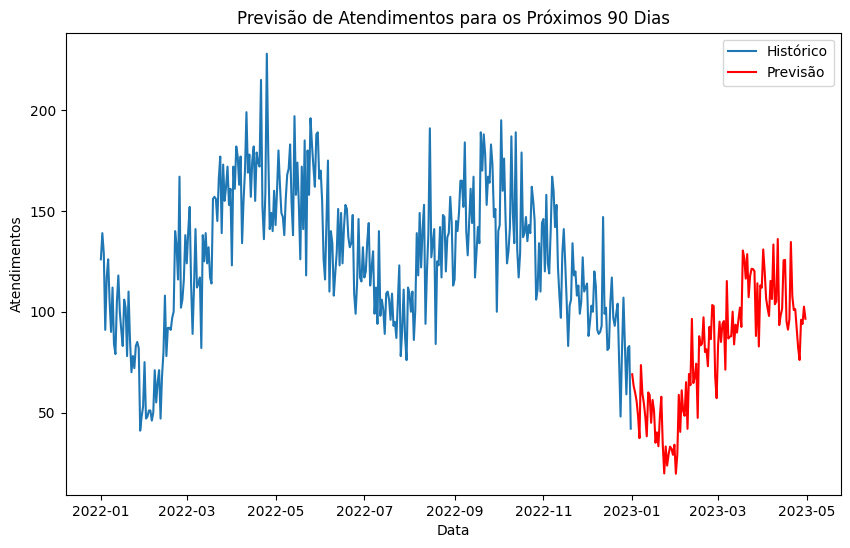

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(ts, label='Histórico')
plt.plot(forecast, label='Previsão', color='red')
plt.legend()
plt.xlabel('Data')
plt.ylabel('Atendimentos')
plt.title('Previsão de Atendimentos para os Próximos 90 Dias')
plt.show()